# Импортирование библиотек

In [114]:
import pandas as pd

In [115]:
import numpy as np

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.dummy import DummyClassifier

In [118]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
from sklearn.metrics import RocCurveDisplay

In [122]:
import matplotlib.pyplot as plt

# Загрузка и анализ датасета

In [123]:
df = pd.read_csv("S05-hw-dataset.csv")

In [124]:
df.head() # первичный анализ

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [125]:
df.info() # первичный анализ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [126]:
df.describe() # первичный анализ

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [127]:
# Пропуски
for column in df.columns:
    if df[column].isna().mean()*100 != 0:
        print(f"Доля пропусков в колонке {column}: {df[column].isna().mean()*100:.2f}% ")
        print(df[df[column].isna()])
# В датасете не найдены пропуски

# Дубликаты
print("Количество дубликатов:", df.duplicated().to_list().count(True)) if df.duplicated().to_list().count(True) != 0 else print("")

In [128]:
print(len(df[(df['age'] >= 21) & (df['age'] <=69 )])) # Проверка возраста

3000


In [129]:
df['default'].value_counts(normalize=True) # анализ распределения таргета

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

#### Датасет достаточно хорошего качества, явных аномалий не обнаружено. Датасет содержит 3000 объектов и 17 признаков. Сильного дисбаланса в распределении таргета не обнаружено (0.41 и 0.59). Из вывода info можно увидеть, что явная проверка диапазонов не требуется.

# Выделение матрицы признаков X и таргета y

In [130]:
y = df['default']
print(y.shape)
X = df.select_dtypes('number').drop(['default', 'client_id'], axis=1) # удаление лишних столбцов из таргета
X = X[(X['debt_to_income'] <= 1) & (X['debt_to_income'] >= 0)] # явная проверка значений debt to income
X

(3000,)


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2
2996,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12
2997,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10
2998,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8


# Разбиение данных на train/test и вывод распределений таргета

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y) 
# разбиение данных с сохранением баланса классов и random_state=42.
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

default
0    0.589583
1    0.410417
Name: proportion, dtype: float64
default
0    0.59
1    0.41
Name: proportion, dtype: float64


# Baseline модель

In [132]:
baseline = DummyClassifier(strategy="stratified", random_state=42) # построение baseline модели

In [133]:
baseline.fit(X_train, y_train) # обучение baseline модели

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'stratified'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [134]:
y_test_pred_baseline = baseline.predict(X_test)
y_test_proba_baseline = baseline.predict_proba(X_test)[:, 1]

In [135]:
print("Оценка бейзлайна по метрикам")
bsl_ac = accuracy_score(y_test, y_test_pred_baseline)
bsl_roc = roc_auc_score(y_test, y_test_proba_baseline)
print("Accuracy :", bsl_ac)
try:
    print("ROC-AUC  :", bsl_roc)
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

Оценка бейзлайна по метрикам
Accuracy : 0.5133333333333333
ROC-AUC  : 0.5007578889348215


#### Бейзлайн позволяет дать нижнюю планку качества для дальнейшей оценки построенной модели. Это позволяет задать минимальную границу, ниже которой более лучшая модель не должна находиться (по метрикам).

# Логистическая регрессия и подбор гиперпараметров

In [136]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
]) # построение пайплайна

In [137]:
param_grid = {
    "logreg__C": [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000, 5000],
}

In [138]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1,
) # подбор гиперпараметров
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Лучшие параметры: {'logreg__C': 50.0}
Лучший ROC-AUC (по CV): 0.8606625890118563


In [139]:
best_model = grid_search.best_estimator_ # лучшая модель
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
lgrg_ac = accuracy_score(y_test, y_test_pred)
lgrg_roc = roc_auc_score(y_test, y_test_proba)
print("Accuracy :", lgrg_ac)
print("ROC-AUC  :", lgrg_roc)

Accuracy : 0.8016666666666666
ROC-AUC  : 0.87564879886087


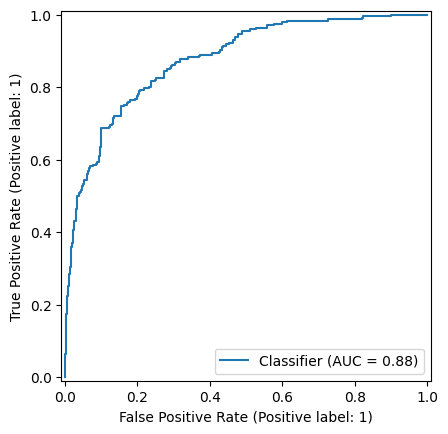

In [140]:
plot = RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plt.savefig("figures/ROC.png")

# Сравнение бейзлайна и логистической регрессии

In [141]:
pd.DataFrame(
    {
        "Metric" : ["Accuracy","ROC-AUC"],
        "Baseline" : [bsl_ac, bsl_roc],
        "LogReg" : [lgrg_ac, lgrg_roc],
    }
)

,Metric,Baseline,LogReg
0,Accuracy,0.513333,0.801667
1,ROC-AUC,0.500758,0.875649


In [142]:
print(f"[ACCURACY] LogReg лучше бейзлайна на {(lgrg_ac-bsl_ac)/bsl_ac*100:.2f}%")
print(f"[ROC-AUC] LogReg лучше бейзлайна на {(lgrg_roc-bsl_roc)/bsl_roc*100:.2f}%")

[ACCURACY] LogReg лучше бейзлайна на 56.17%
[ROC-AUC] LogReg лучше бейзлайна на 74.86%


#### По качеству бейзлайн сильно хуже чем логистическая регрессия. Это хорошо, так как это значит, что модель логистической регрессии превзошла изначальный порог. Логистическая регрессия лучше бейзлайна на 56% по accuracy и на 75% по ROC-AUC. Для этой задачи более разумной моделью является модель логистической регрессии. Она позволяет получить более высокие метрики, что свидетельствует о более высокой эффективности данной модели для исходной задачи. Тем более это больше похоже на задачу классификации (будет ли дефолт или нет).